In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/Python/Desktop/machine learning/Vjezba 3/loan.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [5]:
df.notnull().sum()

age                61
gender             61
occupation         61
education_level    61
marital_status     61
income             61
credit_score       61
loan_status        61
dtype: int64

In [6]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

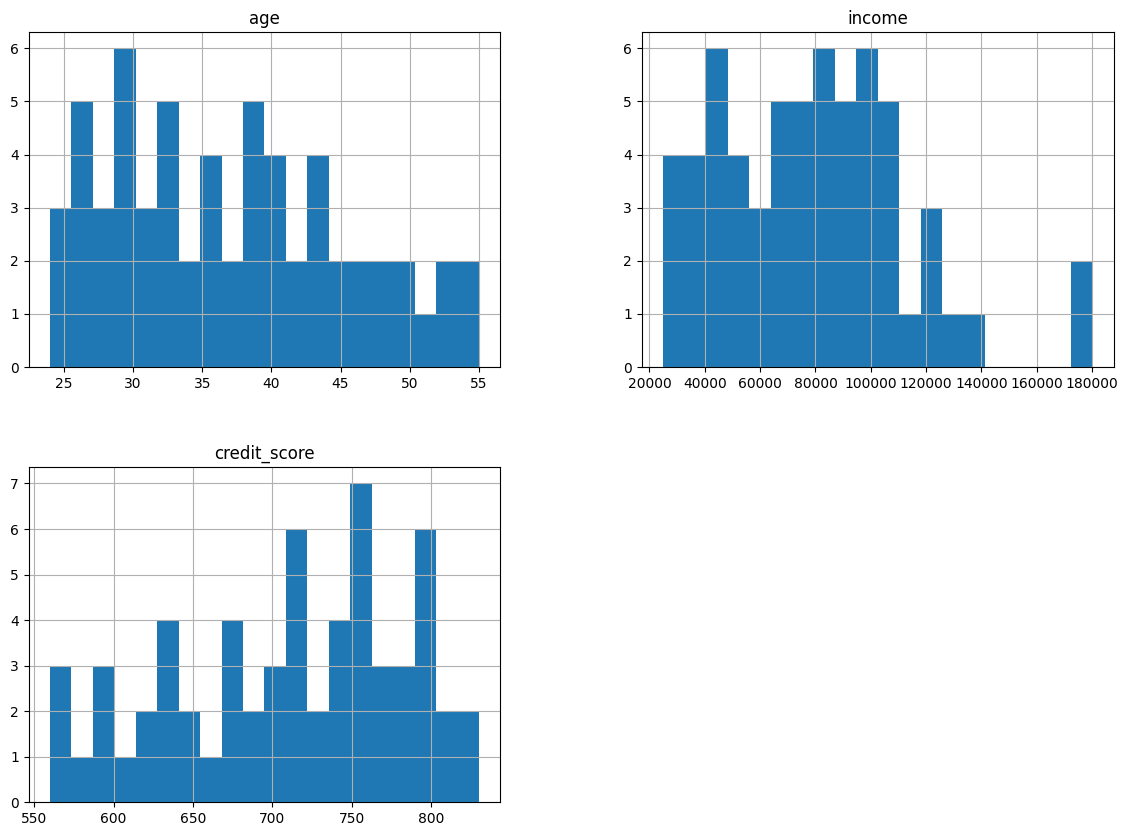

In [8]:
df.hist(bins=20, figsize=(14,10))
plt.show()

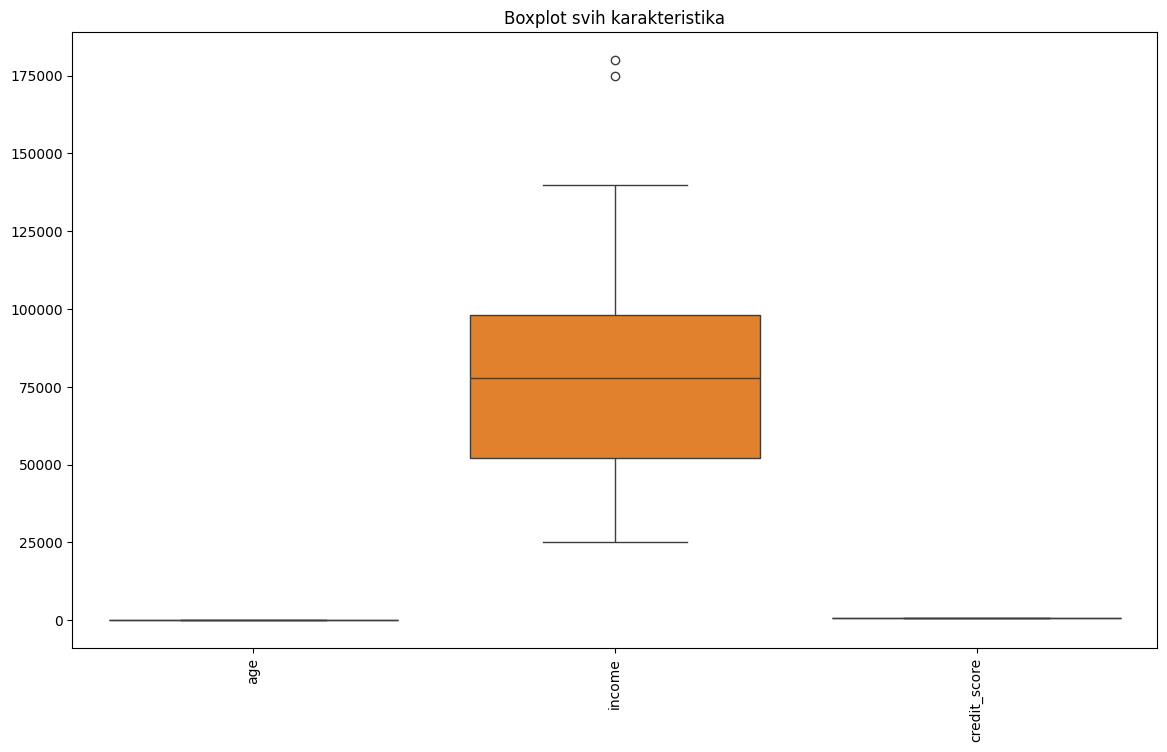

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.title("Boxplot svih karakteristika")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

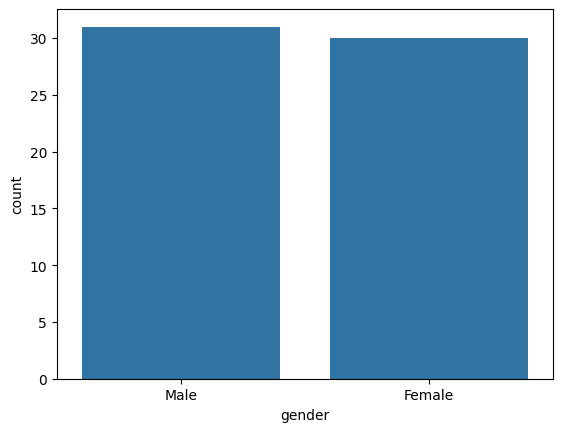

In [10]:
sns.countplot(df, x="gender")

<Axes: xlabel='occupation', ylabel='count'>

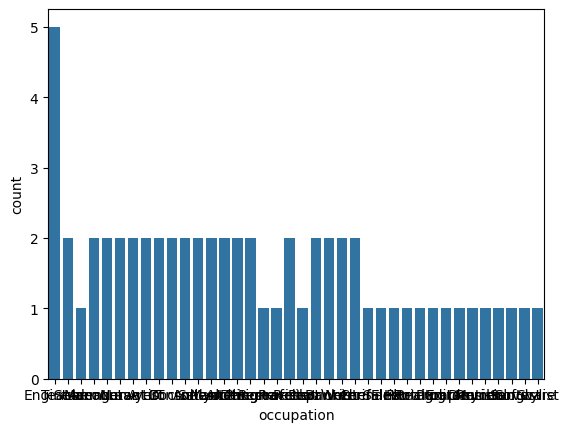

In [11]:
sns.countplot(df, x="occupation")

<Axes: xlabel='education_level', ylabel='count'>

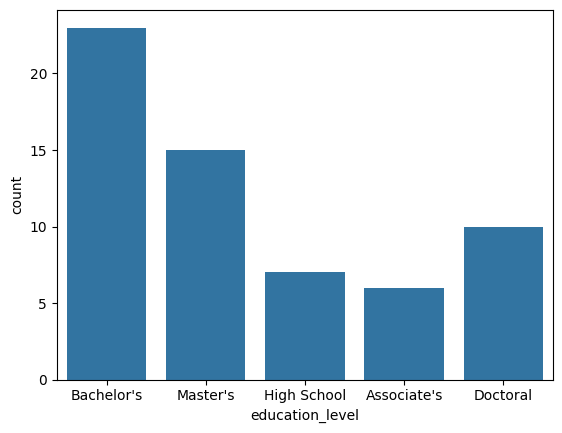

In [12]:
sns.countplot(df, x="education_level")

<Axes: xlabel='marital_status', ylabel='count'>

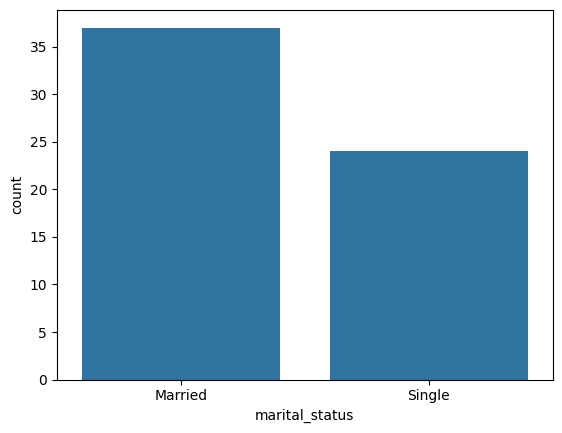

In [13]:
sns.countplot(df, x="marital_status")

<Axes: xlabel='loan_status', ylabel='count'>

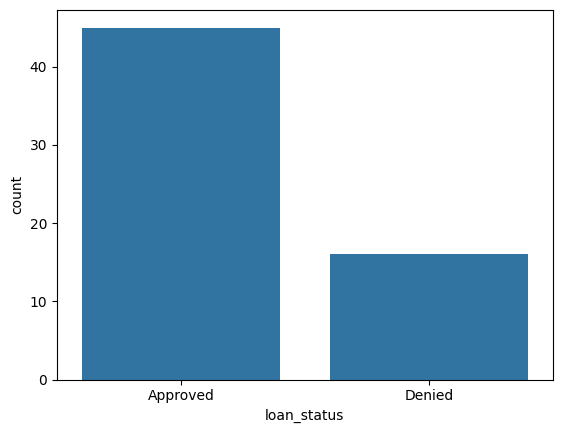

In [14]:
sns.countplot(df, x="loan_status")

In [18]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [15]:
numerical_summary = df.describe()

numerical_summary

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [36]:
label_encoder = LabelEncoder()

In [37]:
df['gender'] = label_encoder.fit_transform(df['gender'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['education_level'] = label_encoder.fit_transform(df['education_level'])
df['marital_status'] = label_encoder.fit_transform(df['marital_status'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

In [38]:
loan_data_prepared = pd.concat([df.drop(['gender', 'occupation', 'education_level', 'marital_status', 'loan_status'], axis=1)], axis=1)

In [40]:
scaler = StandardScaler()
loan_data_prepared[['age', 'income', 'credit_score']] = scaler.fit_transform(loan_data_prepared[['age', 'income', 'credit_score']])

loan_data_prepared.head()


,age,income,credit_score,loan_status_encoded
0,-0.608224,0.179626,0.141015,0
1,0.947653,-0.507063,-0.413949,0
2,-1.086956,-1.611737,-1.662618,1
3,1.665750,0.776746,0.973462,0
4,-0.129493,-0.118935,0.002274,0


In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


# One-hot encoding za varijable za sve kategoričke varijable osim target varijable
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[['gender', 'occupation', 'education_level', 'marital_status']])
encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out())

# Label encoding za target varijablu
label_encoder = LabelEncoder()
df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])

# Dodavanje enkodiranih varijabli(kolona) sa orginalnim DataFrame-om
loan_data_prepared = pd.concat([df.drop(['gender', 'occupation', 'education_level', 'marital_status', 'loan_status'], axis=1), encoded_categorical_df], axis=1)

# Skaliranje numeričkih kolona
scaler = StandardScaler()
loan_data_prepared[['age', 'income', 'credit_score']] = scaler.fit_transform(loan_data_prepared[['age', 'income', 'credit_score']])

loan_data_prepared.head()

,age,income,credit_score,loan_status_encoded,gender_0,gender_1,occupation_0,occupation_1,occupation_2,occupation_3,...,occupation_35,occupation_36,occupation_37,education_level_0,education_level_1,education_level_2,education_level_3,education_level_4,marital_status_0,marital_status_1
0,-0.608224,0.179626,0.141015,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.947653,-0.507063,-0.413949,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.086956,-1.611737,-1.662618,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.665750,0.776746,0.973462,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.129493,-0.118935,0.002274,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
X = loan_data_prepared.drop('loan_status_encoded', axis=1)
y = loan_data_prepared['loan_status_encoded']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = logistic_model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Tačnost našeg modela je: {accuracy*100} %")
print(f"Confusion matrix: \n {conf_matrix}")

Tačnost našeg modela je: 92.3076923076923 %
Confusion matrix: 
 [[8 1]
 [0 4]]
